In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
class Spring:
    def __init__(self, starting_point: float, max_shrink: float = 0.02):
        self.has_position = False
        self.starting_point = starting_point
        self.max_elong = self.starting_point
        self.max_shrink = max_shrink
        
    def anchor(self, value):
        self.has_position = True
        self.starting_point = value
        self.max_elong = self.starting_point
        
    def release(self):
        self.has_position = False
        
    def stretch(self, new_value: float) -> float:
        if self.has_position is False:
            return 0.0
        if new_value >= self.max_elong:
            self.max_elong = new_value
        return self.max_elong
            
    def breaks(self, new_value: float) -> bool:
        if new_value >= self.max_elong:
            self.max_elong = new_value
            # print('update max')
            return False
        else:
            if (self.max_elong - new_value)/self.max_elong > self.max_shrink:
                # print("rompe")
                self.max_elong = new_value
                return True
            else:
                # print('encoje')
                return False

In [22]:
path = '/Users/renero/Code/trader/output/forecast_acciona_konkorde_2019.csv'
df = pd.read_csv(path)
df.head()

,test_y,forecast,verde,azul
0,81.88,82.26,-0.67,-0.27
1,83.10,82.13,-0.67,0.04
2,83.44,84.24,-0.67,0.00
3,83.66,82.80,-0.67,0.08
4,84.84,83.20,-0.67,-0.01


In [23]:
muelle = Spring(df.iloc[0]['test_y'])
df['breaks'] = df.iloc[1:].test_y.apply(muelle.breaks)
df.at[0, 'breaks'] = False

In [24]:
df.head()

,test_y,forecast,verde,azul,breaks
0,81.88,82.26,-0.67,-0.27,False
1,83.10,82.13,-0.67,0.04,False
2,83.44,84.24,-0.67,0.00,False
3,83.66,82.80,-0.67,0.08,False
4,84.84,83.20,-0.67,-0.01,False


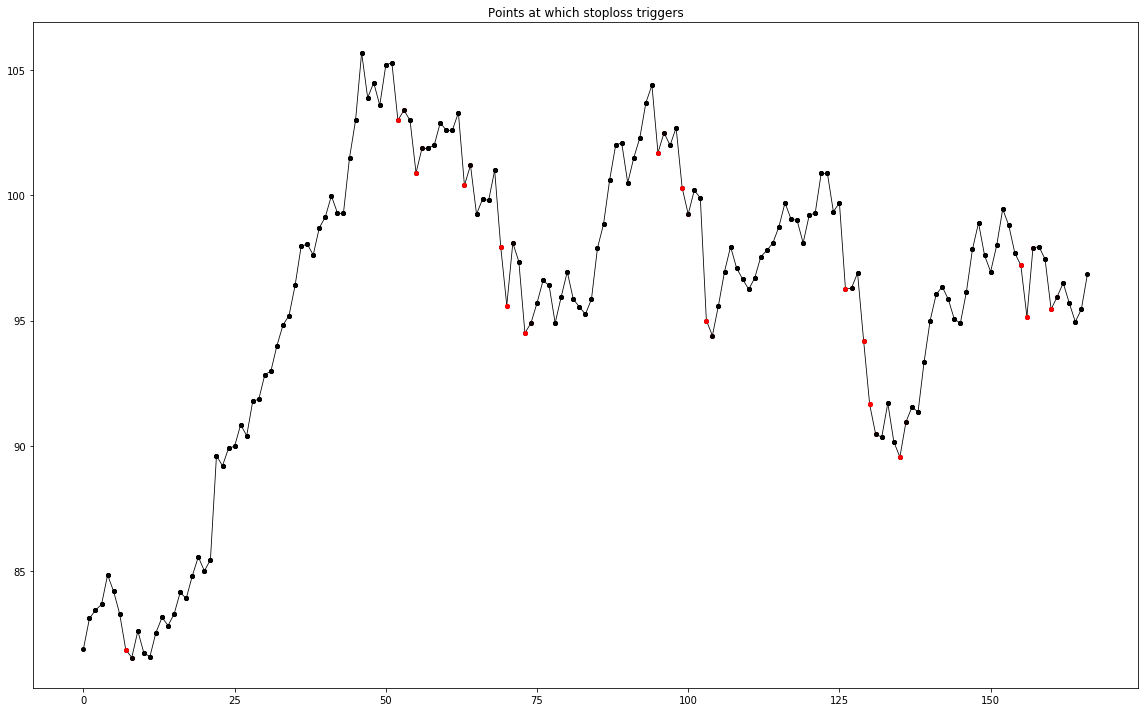

In [25]:
plt.figure(figsize=(16,10))
for i in range(df.shape[0]-1):
    mk_color='red' if df.iloc[i]['breaks'] is True else 'black'
    plt.plot([i, i+1], [df.test_y.iloc[i], df.test_y.iloc[i+1]], 
             color='k', linewidth=0.8, markersize=4.,
             markerfacecolor=mk_color, markeredgecolor=mk_color, marker='o')
plt.title('Points at which stoploss triggers')
plt.tight_layout()
plt.show()

Busco los punto maximos, con respecto a sus valores anteriores.

In [7]:
max_value = -1

def myfunc(x):
    return x[1] > x[0]
    
res = df.test_y.rolling(2).apply(myfunc, raw=True)
res.at[0] = 0.0

NameError: name 'df' is not defined

In [8]:
for i in range(res.shape[0]-1):
    if res.iloc[i+1] == 1.0:
        res.at[i] = 0.0

NameError: name 'res' is not defined

In [9]:
res.head(10)

NameError: name 'res' is not defined

In [10]:
max_value = -1

def myfunc(x):
    global max_value
    if x[1] > x[0] and x[1] > max_value:
        max_value = x[1]
        return 1.
    else:
        return 0.
    
df['max'] = df.test_y.rolling(2).apply(myfunc, raw=True)
df.at[0, 'max'] = 0.0

NameError: name 'df' is not defined

In [11]:
for i in range(res.shape[0]-1):
    if df.iloc[i+1]['max'] == 1.0:
        df.at[i, 'max'] = 0.0

NameError: name 'res' is not defined

In [12]:
plt.figure(figsize=(16,10))
for i in range(df.shape[0]-1):
    mk_color='red' if df.iloc[i]['breaks'] is True else 'black'
    mk_color='green' if df.iloc[i]['max'] == 1.0 else mk_color
    plt.plot([i, i+1], [df.test_y.iloc[i], df.test_y.iloc[i+1]], 
             color='k', linewidth=0.8,
             markerfacecolor=mk_color, markeredgewidth=0., marker='o')
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

<Figure size 1152x720 with 0 Axes>